1. Find contours

In [154]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

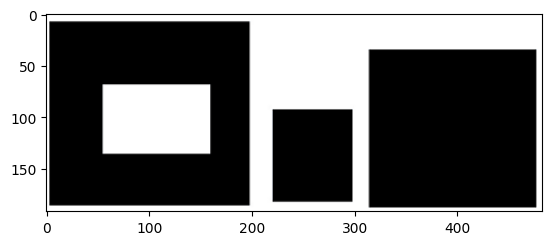

In [155]:
img = cv2.imread('/content/drive/MyDrive/OpenCV/Photos/Hierarchy-and-Retrieval-mode-using-OpenCV.png')
plt.imshow(img[:,:,::-1])

Grayscale

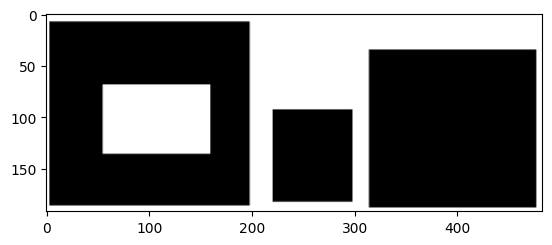

In [156]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

Find Canny edges

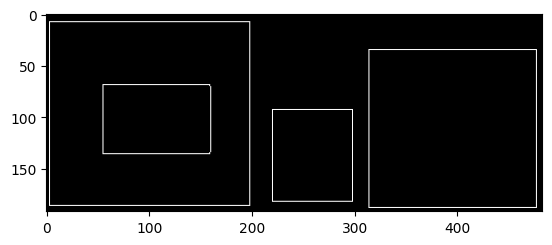

In [157]:
edge = cv2.Canny(gray_img, 100, 150)
plt.imshow(edge, cmap='gray')

Finding contours

Number of contours: 3


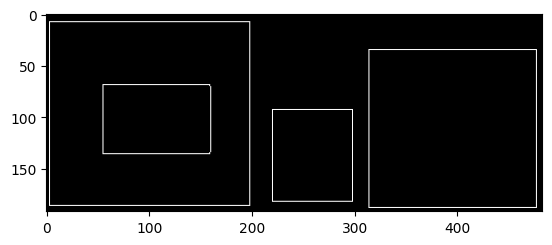

In [158]:
contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(edge, cmap='gray')
print('Number of contours:', len(contours))

Draw all contours

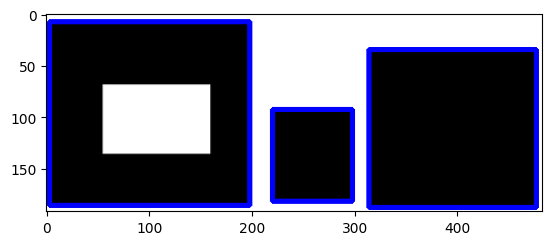

In [159]:
copy_img = img.copy()
cv2.drawContours(copy_img,contours,-1, (0,0,255),3)
plt.imshow(copy_img)

findContours có 2 thông số quan trọng là mode và method:

- mode xác định chế độ tìm đường viền. Có 3 chế độ khác nhau:
  - RETR_EXTERNAL: Chỉ tìm các đường viền bên ngoài.
  - RETR_LIST: Tìm tất cả các đường viền, bao gồm cả các đường viền bên trong và bên ngoài.
  - RETR_TREE: Tìm tất cả các đường viền và xây dựng một cây đường viền.
- method xác định phương pháp xấp xỉ đường viền. Có 2 phương pháp:
  - CHAIN_APPROX_NONE: Không xấp xỉ đường viền. Phương pháp này lưu trữ tất cả các điểm ảnh trong đường viền.
  - CHAIN_APPROX_SIMPLE: Xấp xỉ đường viền bằng cách loại bỏ các điểm ảnh không cần thiết. Phương pháp này chỉ lưu trữ các điểm ảnh bắt đầu và kết thúc của đường viền.
  
  Về mặt chung, CHAIN_APPROX_SIMPLE được sử dụng phổ biến hơn do nó nhanh hơn và tiết kiệm bộ nhớ hơn. Tuy nhiên, CHAIN_APPROX_NONE có độ chính xác cao hơn, vì nó lưu trữ tất cả các điểm ảnh trong đường viền.

Ví dụ với RETR_EXTERNAL và RETR_LIST. Trong khi RETR_LIST tìm được toàn bộ 4 hình chữ nhật, RETR_EXTERNAL bỏ sót hình chữ nhật bên trong.

In [160]:
contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Number of contours:', len(contours))

Number of contours: 3


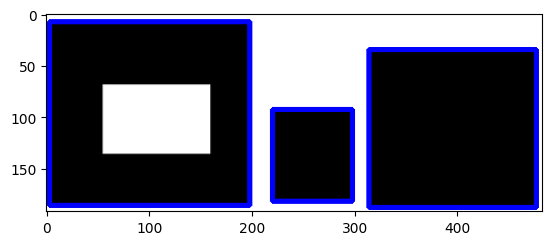

In [161]:
copy_img = img.copy()
cv2.drawContours(copy_img,contours,-1, (0,0,255),3)
plt.imshow(copy_img)

In [162]:
contours, hierarchy = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print('Number of contours:', len(contours))

Number of contours: 8


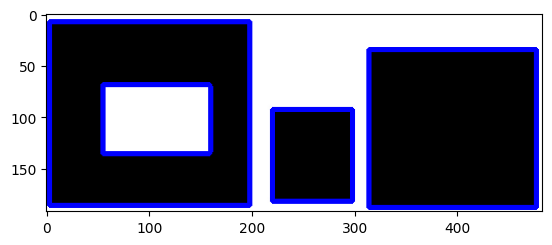

In [163]:
copy_img = img.copy()
cv2.drawContours(copy_img,contours,-1, (0,0,255),3)
plt.imshow(copy_img)

Hàm cv2.drawContours() trong OpenCV được sử dụng để vẽ các đường viền trong một hình ảnh. Hàm này có năm tham số chính:

- image: Hình ảnh cần vẽ đường viền.
- contours: Mảng các đường viền cần được vẽ.
- index: Chỉ định đường viền nào cần được vẽ. Nếu index là -1, tất cả các đường viền sẽ được vẽ.
- color: Màu sắc của đường viền.
- thickness: Độ dày của đường viền.

2. Approximating Contours and Finding their Convex hull

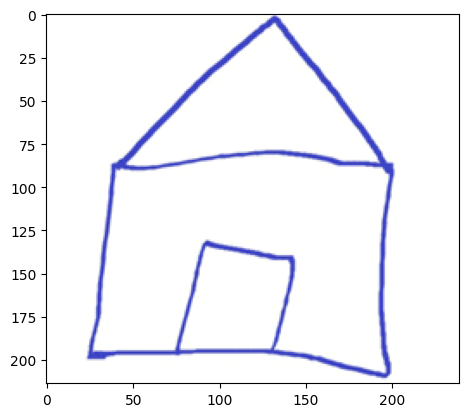

In [164]:
img2 = cv2.imread('/content/drive/MyDrive/OpenCV/Photos/Conex-Hull-using-OpenCV.png')
plt.imshow(img2[:,:,::-1])

Grayscale and binarize the image

In [165]:
gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)


Find Contours

In [166]:
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [167]:
img_copy = img2.copy()

Iterate through each contour and compute their bounding rectangle

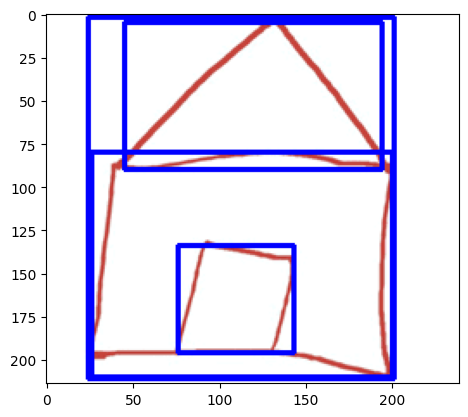

In [168]:
for c in contours:
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,0,255),2)
plt.imshow(img_copy)

Iterate through each contour and compute the approx contour

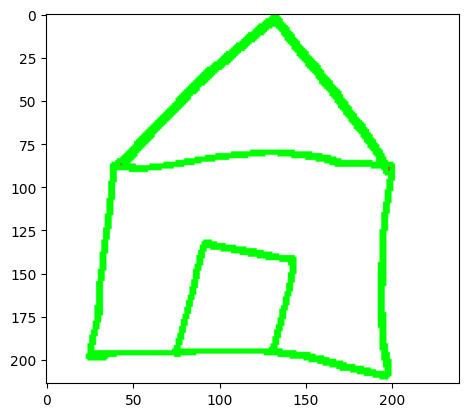

In [169]:
img_copy = img2.copy()
for c in contours:
  accuracy = 0.0003*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,accuracy,True)
  cv2.drawContours(img_copy,[approx],-1,(0,255,0),2)
plt.imshow(img_copy)

Hàm cv2.approxPolyDP() được sử dụng để xấp xỉ một đường cong bằng một đa giác có số đỉnh tối thiểu. Hàm này có ba tham số chính:

- contour: Đường cong cần được xấp xỉ.
- epsilon: Độ chính xác của xấp xỉ. Giá trị epsilon càng nhỏ, đường viền xấp xỉ càng chính xác nhưng sẽ chậm hơn.
- closed: Chỉ định liệu đường cong được coi là đóng hay không.

3. Matching contour by shapes

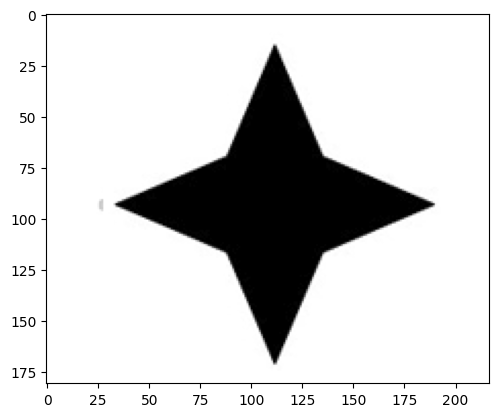

In [170]:
template = cv2.imread('/content/drive/MyDrive/OpenCV/Photos/Matching-Contour-using-OpenCV-star.png',0)
plt.imshow(template,cmap='gray')

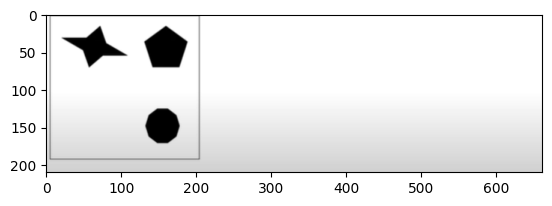

In [171]:
target = cv2.imread('/content/drive/MyDrive/OpenCV/Photos/target_img.png')
gray_target = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_target,cmap='gray')

In [172]:
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(gray_target, 127, 255, 0)

Find contours in template

In [173]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


In [174]:
# Sort the contours by area to remove the largest contours

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Extract the second largest contour
template_contour = contours[1]

In [175]:
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

Lấy Contour lớn nhất của ảnh Template.

Sau đó lấy các contours của ảnh Target. Sử dụng matchShapes để xem những contours nào của target khớp với contour của template và hiển thị lên.

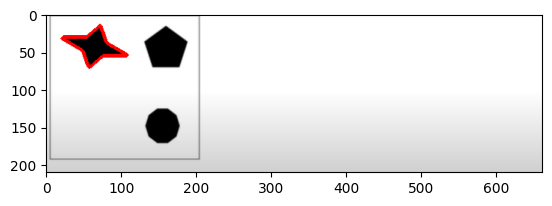

In [176]:
for c in contours:
  match = cv2.matchShapes(template_contour, c, 1, 0.0)
  if match < 0.16:
    closest_contour = c
  else:
    closest_contour = []


cv2.drawContours(target,[closest_contour], -1, (0,0,255), 3)
plt.imshow(target[:,:,::-1])

4. Indetifying shapes (circle, rectangle, triangle, square, star)

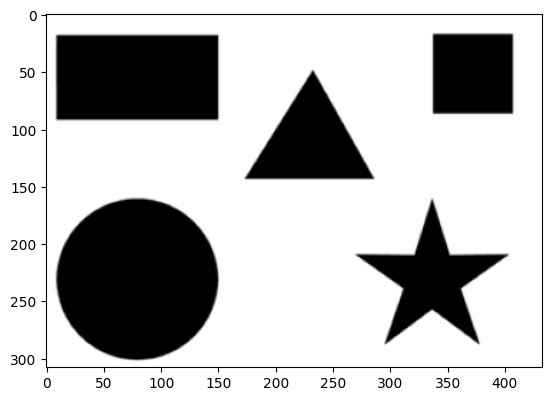

In [177]:
image = cv2.imread('/content/drive/MyDrive/OpenCV/Photos/Screenshot 2023-09-15 141521.png')
plt.imshow(image[:,:,::-1])

In [178]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(gray, 127,255,1)

Extract contours

In [179]:
contours, hierarchy = cv2.findContours(threshold.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [180]:
print(len(contours))

5


Find contour center and place text for each shape

Lệnh cv2.moment() trả về một đối tượng Moments, đại diện cho các mô men của đường viền. Đối tượng này có các thuộc tính sau:

- m00: Diện tích của đường viền.
- m10: Trung tâm trọng lực của đường viền theo trục x.
- m01: Trung tâm trọng lực của đường viền theo trục y.
- mu11: Mô men thứ hai theo trục x.
- mu02: Mô men thứ hai theo trục y.
- mu20: Mô men thứ ba theo trục x.
- mu03: Mô men thứ ba theo trục y.
- mu12: Mô men thứ tư theo trục x.
- mu21: Mô men thứ tư theo trục y.

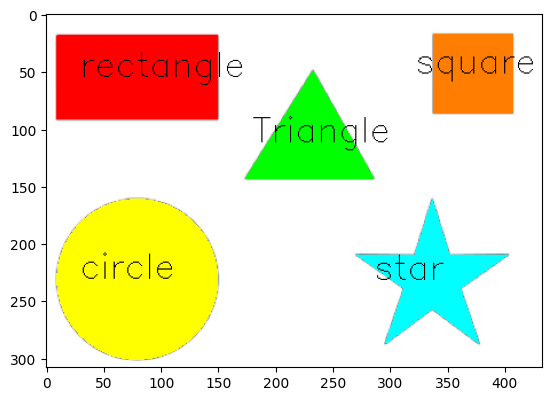

In [181]:
for cnt in contours:
  approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
  # Tìm trọng tâm của đối tượng
  M = cv2.moments(cnt)
  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])

  if len(approx) == 3:
    shape_name = 'Triangle'
    cv2.drawContours(image,[cnt],0,(0,255,0),-1)
    cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,0), 1)
  elif len(approx) == 4:
    x,y,w,h = cv2.boundingRect(cnt)
    if abs(w-h)<=3:
      shape_name='square'
      cv2.drawContours(image,[cnt],0,(0,125,255),-1)
      cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
    else:
      shape_name = 'rectangle'
      cv2.drawContours(image,[cnt],0,(0,0,255),-1)
      cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
  elif len(approx)==10:
    shape_name = 'star'
    cv2.drawContours(image,[cnt],0,(255,255,0),-1)
    cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
  elif len(approx)>=15:
    shape_name = 'circle'
    cv2.drawContours(image,[cnt],0,(0,255,255),-1)
    cv2.putText(image,shape_name,(cx-50,cy),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)


plt.imshow(image[:,:,::-1])